# **XGBM & LGBM**

# Exploratory Data Analysis (EDA)
a. Load the Titanic Dataset

In [2]:
import pandas as pd

train_data = pd.read_csv('/content/Titanic_train.csv')
test_data = pd.read_csv('/content/Titanic_test.csv')


Check for Missing Values

In [3]:
print(train_data.isnull().sum())
print(test_data.isnull().sum())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


Explore Data Distributions

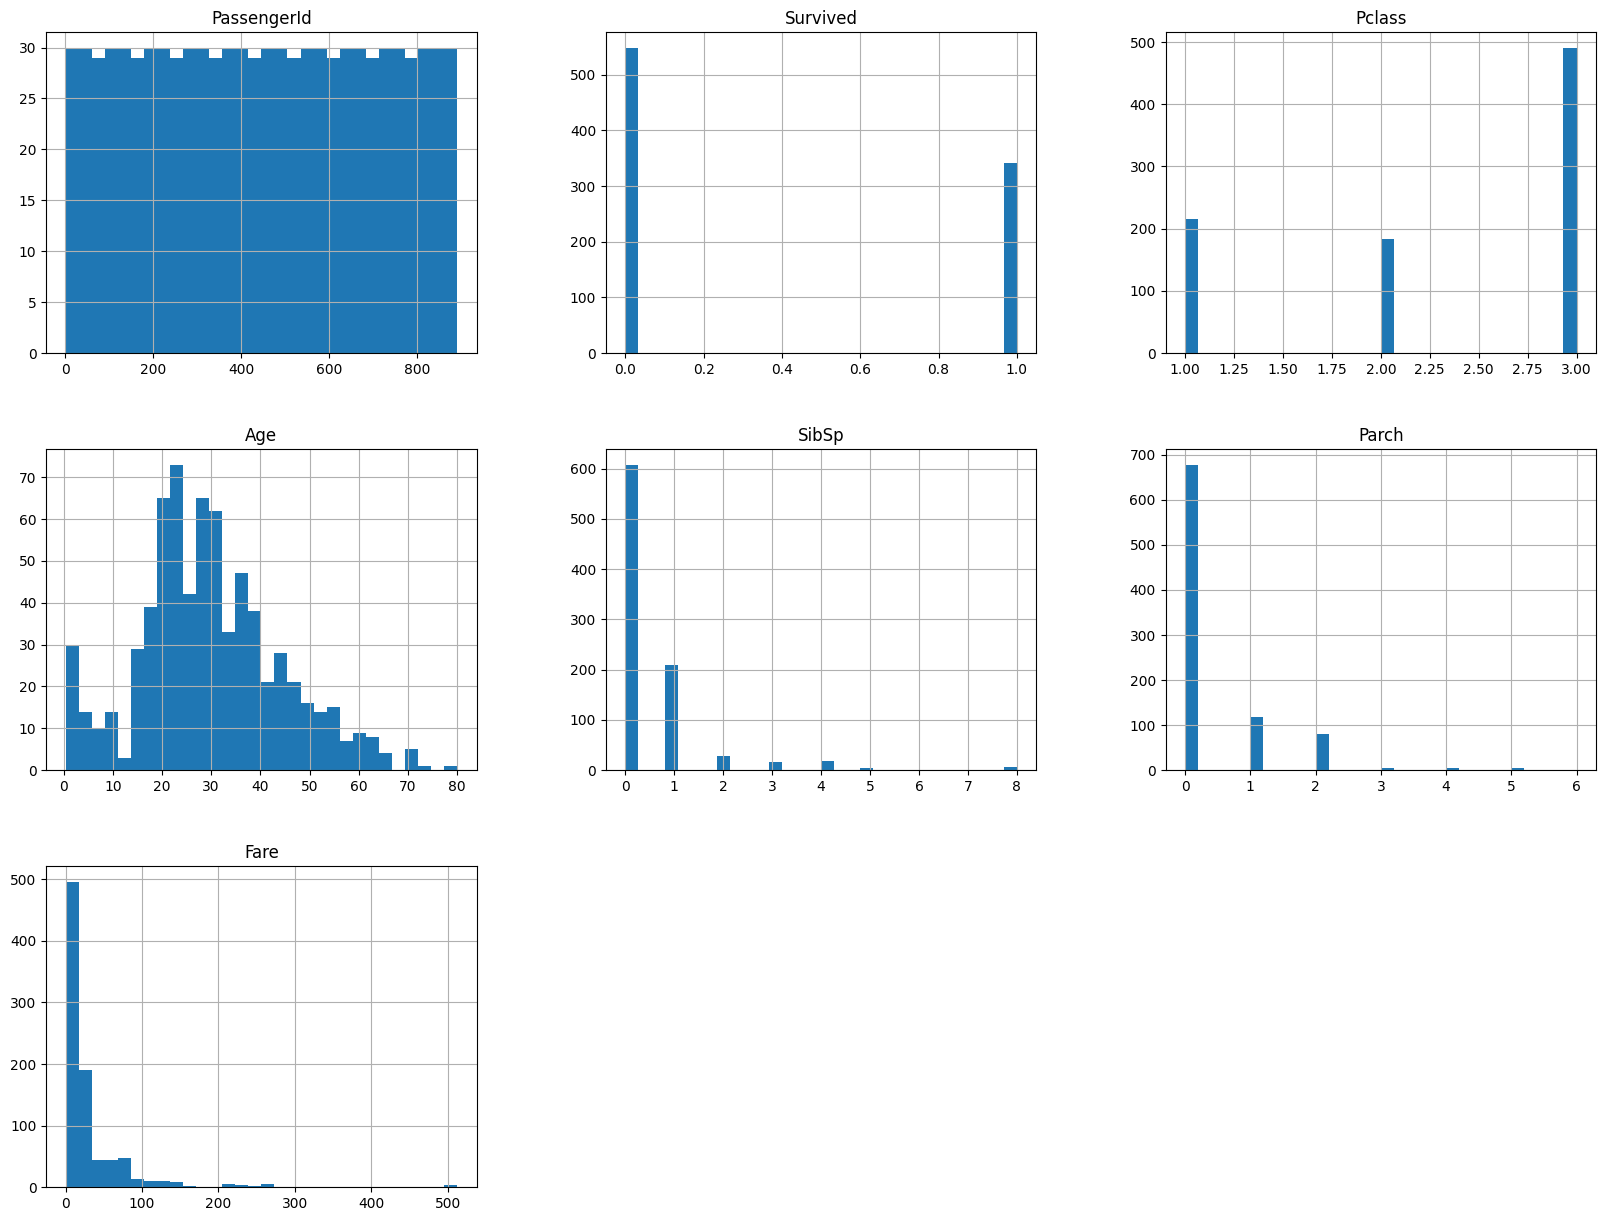

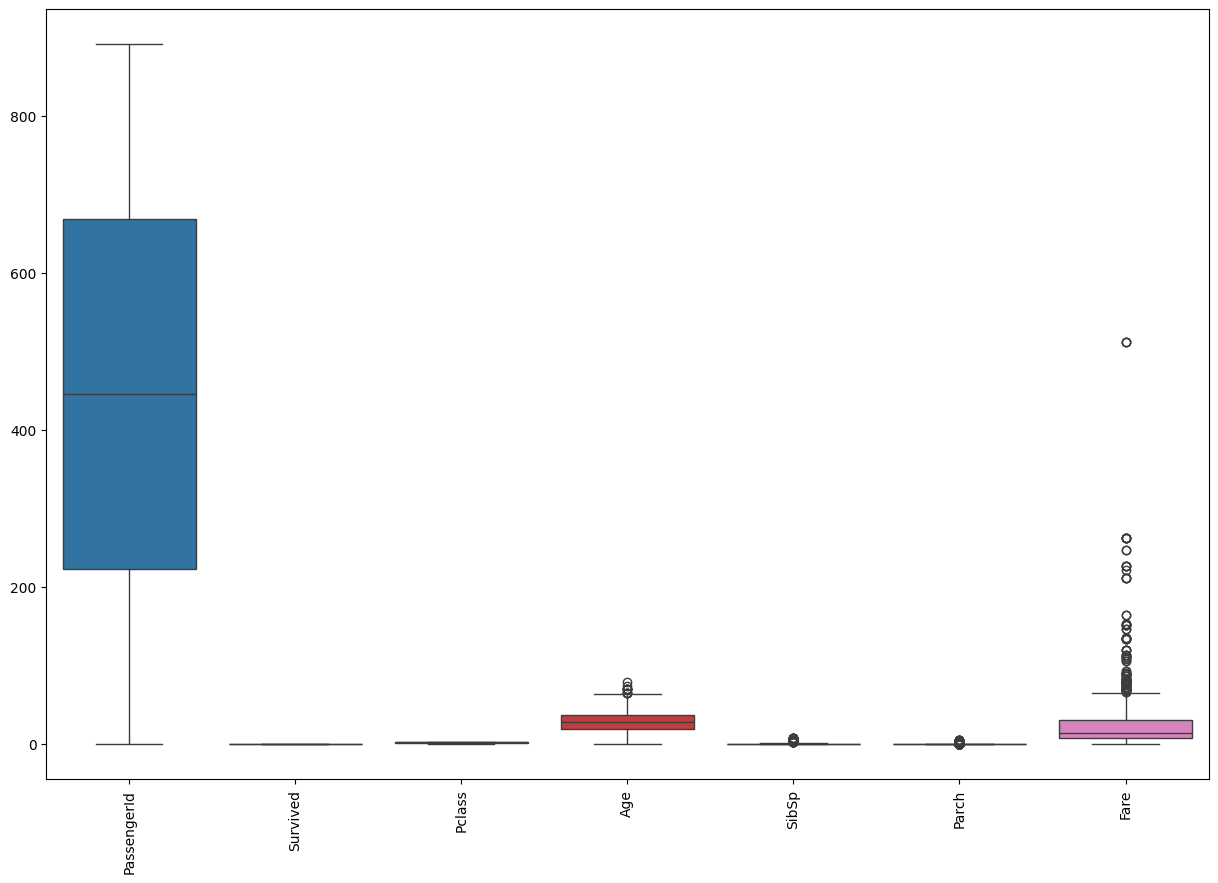

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms
train_data.hist(bins=30, figsize=(20,15))
plt.show()

# Box plots
plt.figure(figsize=(15,10))
sns.boxplot(data=train_data)
plt.xticks(rotation=90)
plt.show()


Visualize Relationships

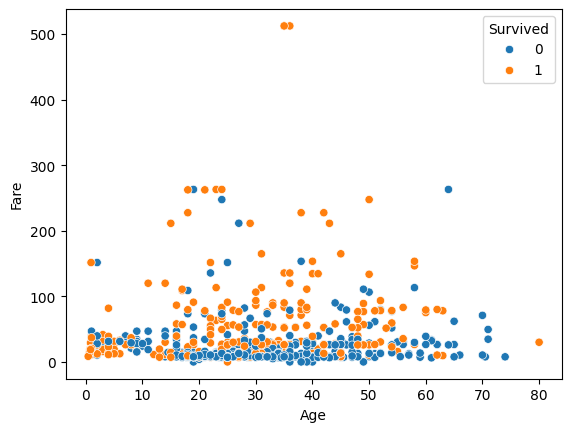

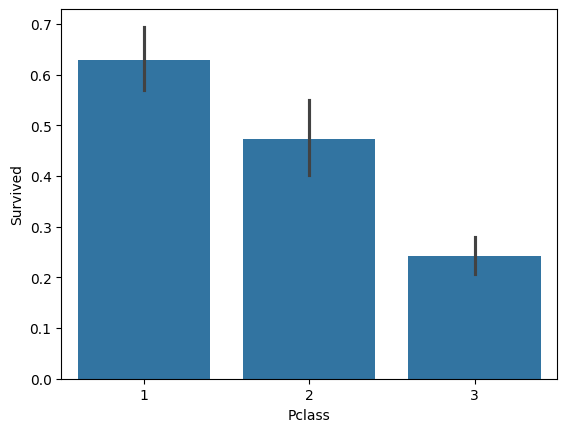

In [5]:
# Scatter plot
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=train_data)
plt.show()

# Bar plot
sns.barplot(x='Pclass', y='Survived', data=train_data)
plt.show()


#  Data Preprocessing
 Impute Missing Values


In [6]:
# Fill missing Age values with median
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
test_data['Age'].fillna(test_data['Age'].median(), inplace=True)


In [7]:
# Fill missing Embarked values with mode
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)

In [8]:
# Fill missing Fare values in test set with median
test_data['Fare'].fillna(test_data['Fare'].median(), inplace=True)

 Encode Categorical Variables

In [9]:
train_data = pd.get_dummies(train_data, columns=['Sex', 'Embarked'])
test_data = pd.get_dummies(test_data, columns=['Sex', 'Embarked'])


# Building Predictive Models
Split the Datase

In [10]:
from sklearn.model_selection import train_test_split

X = train_data.drop(['Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
y = train_data['Survived']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


Choose Evaluation Metrics

In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score



Build Predictive Models

In [12]:
import lightgbm as lgb
from xgboost import XGBClassifier

# LightGBM
lgbm_model = lgb.LGBMClassifier()
lgbm_model.fit(X_train, y_train)
lgbm_predictions = lgbm_model.predict(X_val)

# XGBoost
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_val)


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001756 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 437
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

 Evaluate Model Performance

In [13]:
# LightGBM Evaluation
print("LightGBM Accuracy:", accuracy_score(y_val, lgbm_predictions))
print("LightGBM Precision:", precision_score(y_val, lgbm_predictions))
print("LightGBM Recall:", recall_score(y_val, lgbm_predictions))
print("LightGBM F1-score:", f1_score(y_val, lgbm_predictions))

# XGBoost Evaluation
print("XGBoost Accuracy:", accuracy_score(y_val, xgb_predictions))
print("XGBoost Precision:", precision_score(y_val, xgb_predictions))
print("XGBoost Recall:", recall_score(y_val, xgb_predictions))
print("XGBoost F1-score:", f1_score(y_val, xgb_predictions))


LightGBM Accuracy: 0.8044692737430168
LightGBM Precision: 0.7746478873239436
LightGBM Recall: 0.7432432432432432
LightGBM F1-score: 0.7586206896551724
XGBoost Accuracy: 0.7821229050279329
XGBoost Precision: 0.7397260273972602
XGBoost Recall: 0.7297297297297297
XGBoost F1-score: 0.7346938775510203


 Optimize Model Performance

In [14]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning for LightGBM
lgbm_param_grid = {
    'num_leaves': [31, 50],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200]
}
lgbm_grid = GridSearchCV(lgbm_model, param_grid=lgbm_param_grid, cv=5)
lgbm_grid.fit(X_train, y_train)

# Hyperparameter tuning for XGBoost
xgb_param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200]
}
xgb_grid = GridSearchCV(xgb_model, param_grid=xgb_param_grid, cv=5)
xgb_grid.fit(X_train, y_train)


Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...n=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 7], 'n_estimators': [100, 200]})

# Comparative Analysis
Compare Performance Metrics

In [15]:
# Optimal LightGBM Evaluation
optimal_lgbm_predictions = lgbm_grid.predict(X_val)
print("Optimal LightGBM Accuracy:", accuracy_score(y_val, optimal_lgbm_predictions))
print("Optimal LightGBM Precision:", precision_score(y_val, optimal_lgbm_predictions))
print("Optimal LightGBM Recall:", recall_score(y_val, optimal_lgbm_predictions))
print("Optimal LightGBM F1-score:", f1_score(y_val, optimal_lgbm_predictions))

# Optimal XGBoost Evaluation
optimal_xgb_predictions = xgb_grid.predict(X_val)
print("Optimal XGBoost Accuracy:", accuracy_score(y_val, optimal_xgb_predictions))
print("Optimal XGBoost Precision:", precision_score(y_val, optimal_xgb_predictions))
print("Optimal XGBoost Recall:", recall_score(y_val, optimal_xgb_predictions))
print("Optimal XGBoost F1-score:", f1_score(y_val, optimal_xgb_predictions))


Optimal LightGBM Accuracy: 0.8100558659217877
Optimal LightGBM Precision: 0.7702702702702703
Optimal LightGBM Recall: 0.7702702702702703
Optimal LightGBM F1-score: 0.7702702702702703
Optimal XGBoost Accuracy: 0.7988826815642458
Optimal XGBoost Precision: 0.8064516129032258
Optimal XGBoost Recall: 0.6756756756756757
Optimal XGBoost F1-score: 0.7352941176470588


 Visualize and Interpret Results

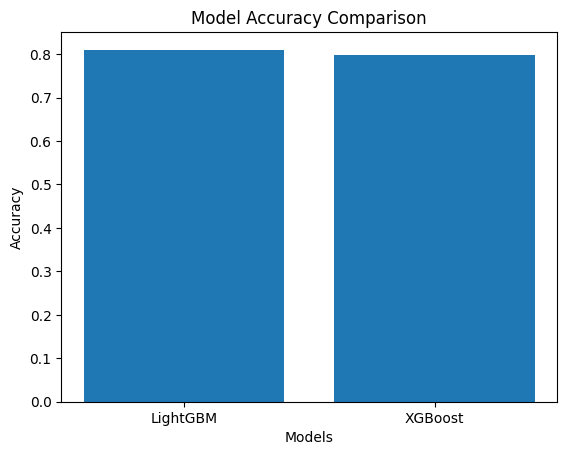

In [16]:
import matplotlib.pyplot as plt

# Accuracy comparison
models = ['LightGBM', 'XGBoost']
accuracies = [accuracy_score(y_val, optimal_lgbm_predictions), accuracy_score(y_val, optimal_xgb_predictions)]

plt.bar(models, accuracies)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.show()
